<a href="https://colab.research.google.com/github/diyagoel/Machine-learning/blob/main/Customer_Segmentation_Wholesale_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Customer Segmentation Using Wholesale Customers Dataset

#### *Objective*
The goal of this project is to segment wholesale customers based on their annual spending
patterns across different product categories using unsupervised machine learning.
These segments can help businesses understand customer behavior and design targeted
marketing and inventory strategies.


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Dataset Overview

- Each row represents a wholesale customer.
- Features represent annual spending in different product categories.
- There is no target variable, making this an unsupervised learning problem.


In [9]:
df.isnull().sum()


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [10]:
#excluded categorical identifiers to cluster customers purely on spending behavior.
X = df.drop(['Channel', 'Region'], axis=1)


In [11]:
#feature-scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
inertia = []
#optimal clusters-elbow method
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


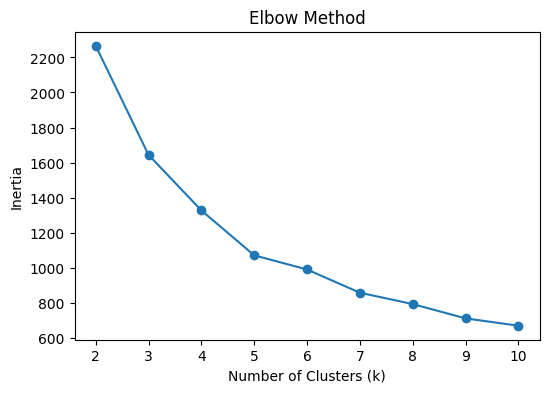

In [13]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [14]:
#validate using silhoutte score
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.400
k=3, Silhouette Score=0.458
k=4, Silhouette Score=0.349
k=5, Silhouette Score=0.369
k=6, Silhouette Score=0.276


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.282857,2.534286,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,1.113208,2.698113,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,2.000000,2.405405,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


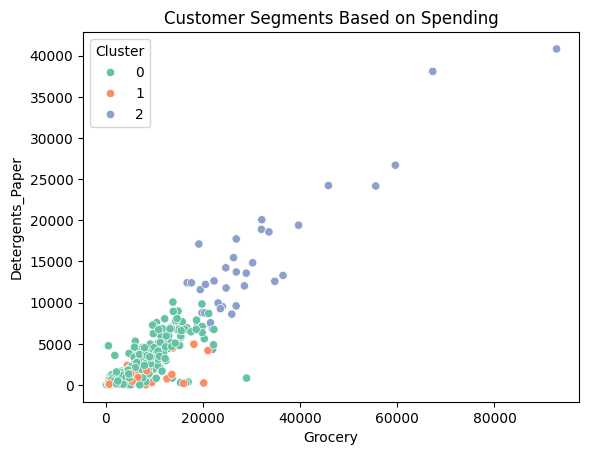

In [17]:
sns.scatterplot(
    x=df['Grocery'],
    y=df['Detergents_Paper'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segments Based on Spending")
plt.show()

#### Cluster Interpretation

- Cluster 0: High grocery and detergent spending → likely retail buyers
- Cluster 1: High fresh and frozen spending → hotel/restaurant customers
- Cluster 2: Low overall spending → small-scale buyers

#### Conclusion

Using K-Means clustering, customers were grouped into meaningful segments
based on their purchasing behavior. These insights can help businesses
optimize pricing, inventory, and targeted marketing strategies.



/tmp/ipython-input-773098597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
/tmp/ipython-input-773098597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
/tmp/ipython-input-773098597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
/tmp/ipython-input-773098597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

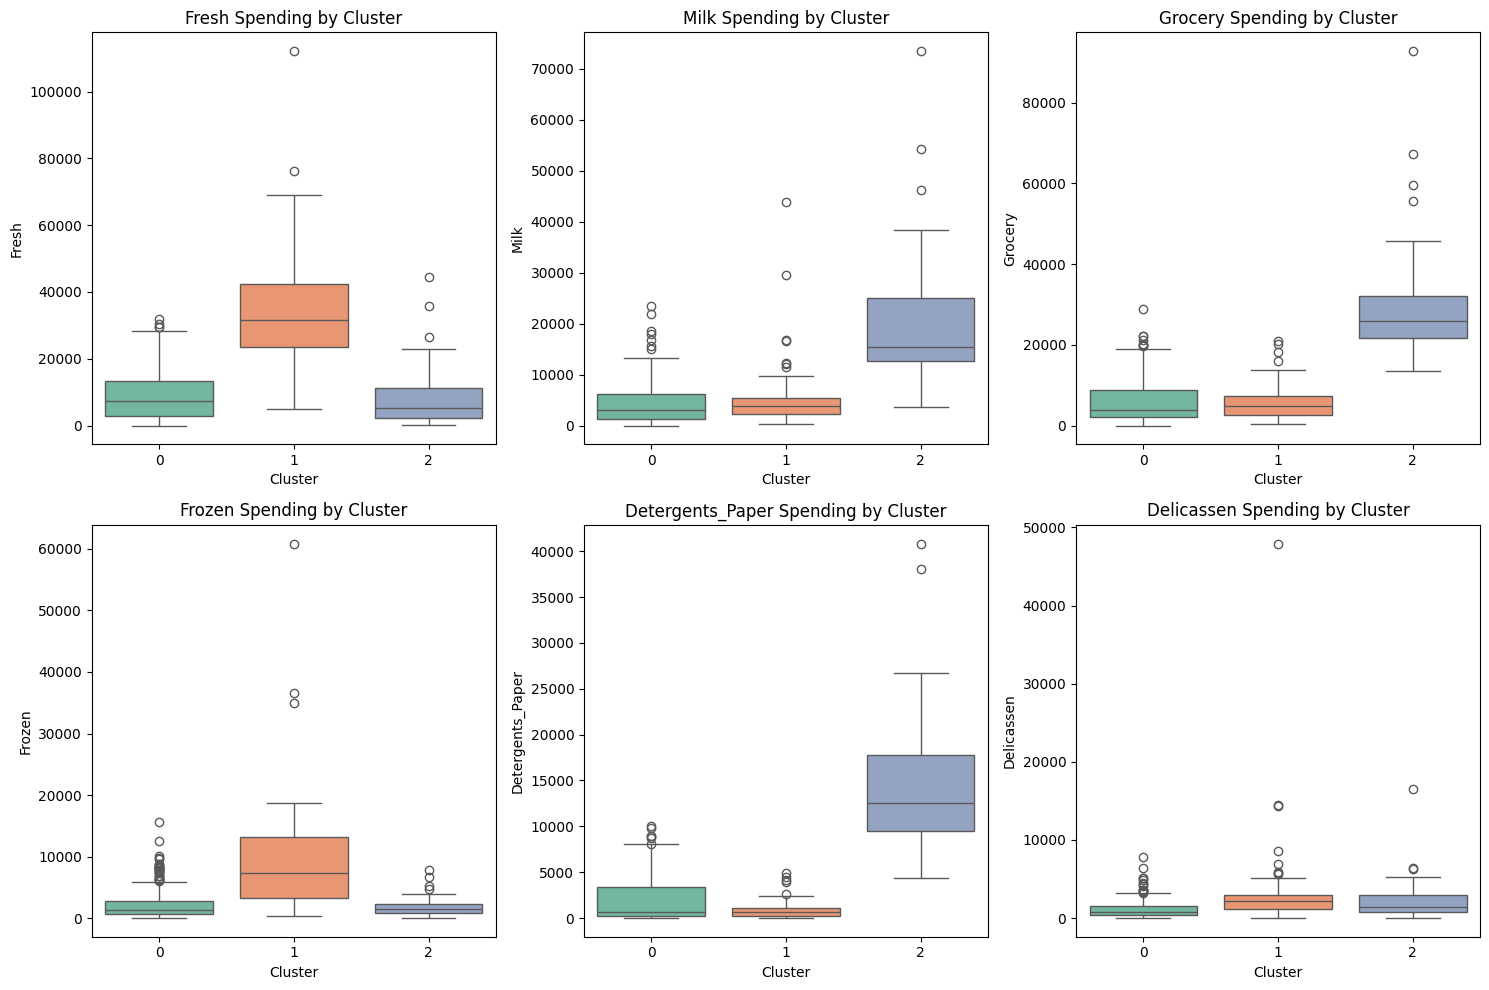

In [18]:
spending_features = [
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicassen'
]
plt.figure(figsize=(15, 10))

for i, feature in enumerate(spending_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} Spending by Cluster')

plt.tight_layout()
plt.show()

#### *Cluster-wise Spending Insights*

- Cluster 0 shows high median spending on Grocery and Detergents_Paper,
  indicating bulk retail buyers.

- Cluster 1 has higher Fresh and Frozen spending,
  suggesting hotel or restaurant customers.

- Cluster 2 has consistently low spending across all categories,
  representing small or low-volume buyers.

- Detergents_Paper shows the clearest separation between clusters,
  making it a strong differentiating feature.

 #### *Business Recommendations*

- Offer volume discounts to Cluster 0 customers to increase loyalty.
- Provide fresh produce bundles to Cluster 1 customers.
- Use targeted promotions or onboarding offers for Cluster 2 to increase engagement.

